# Prédiction de calories brulées

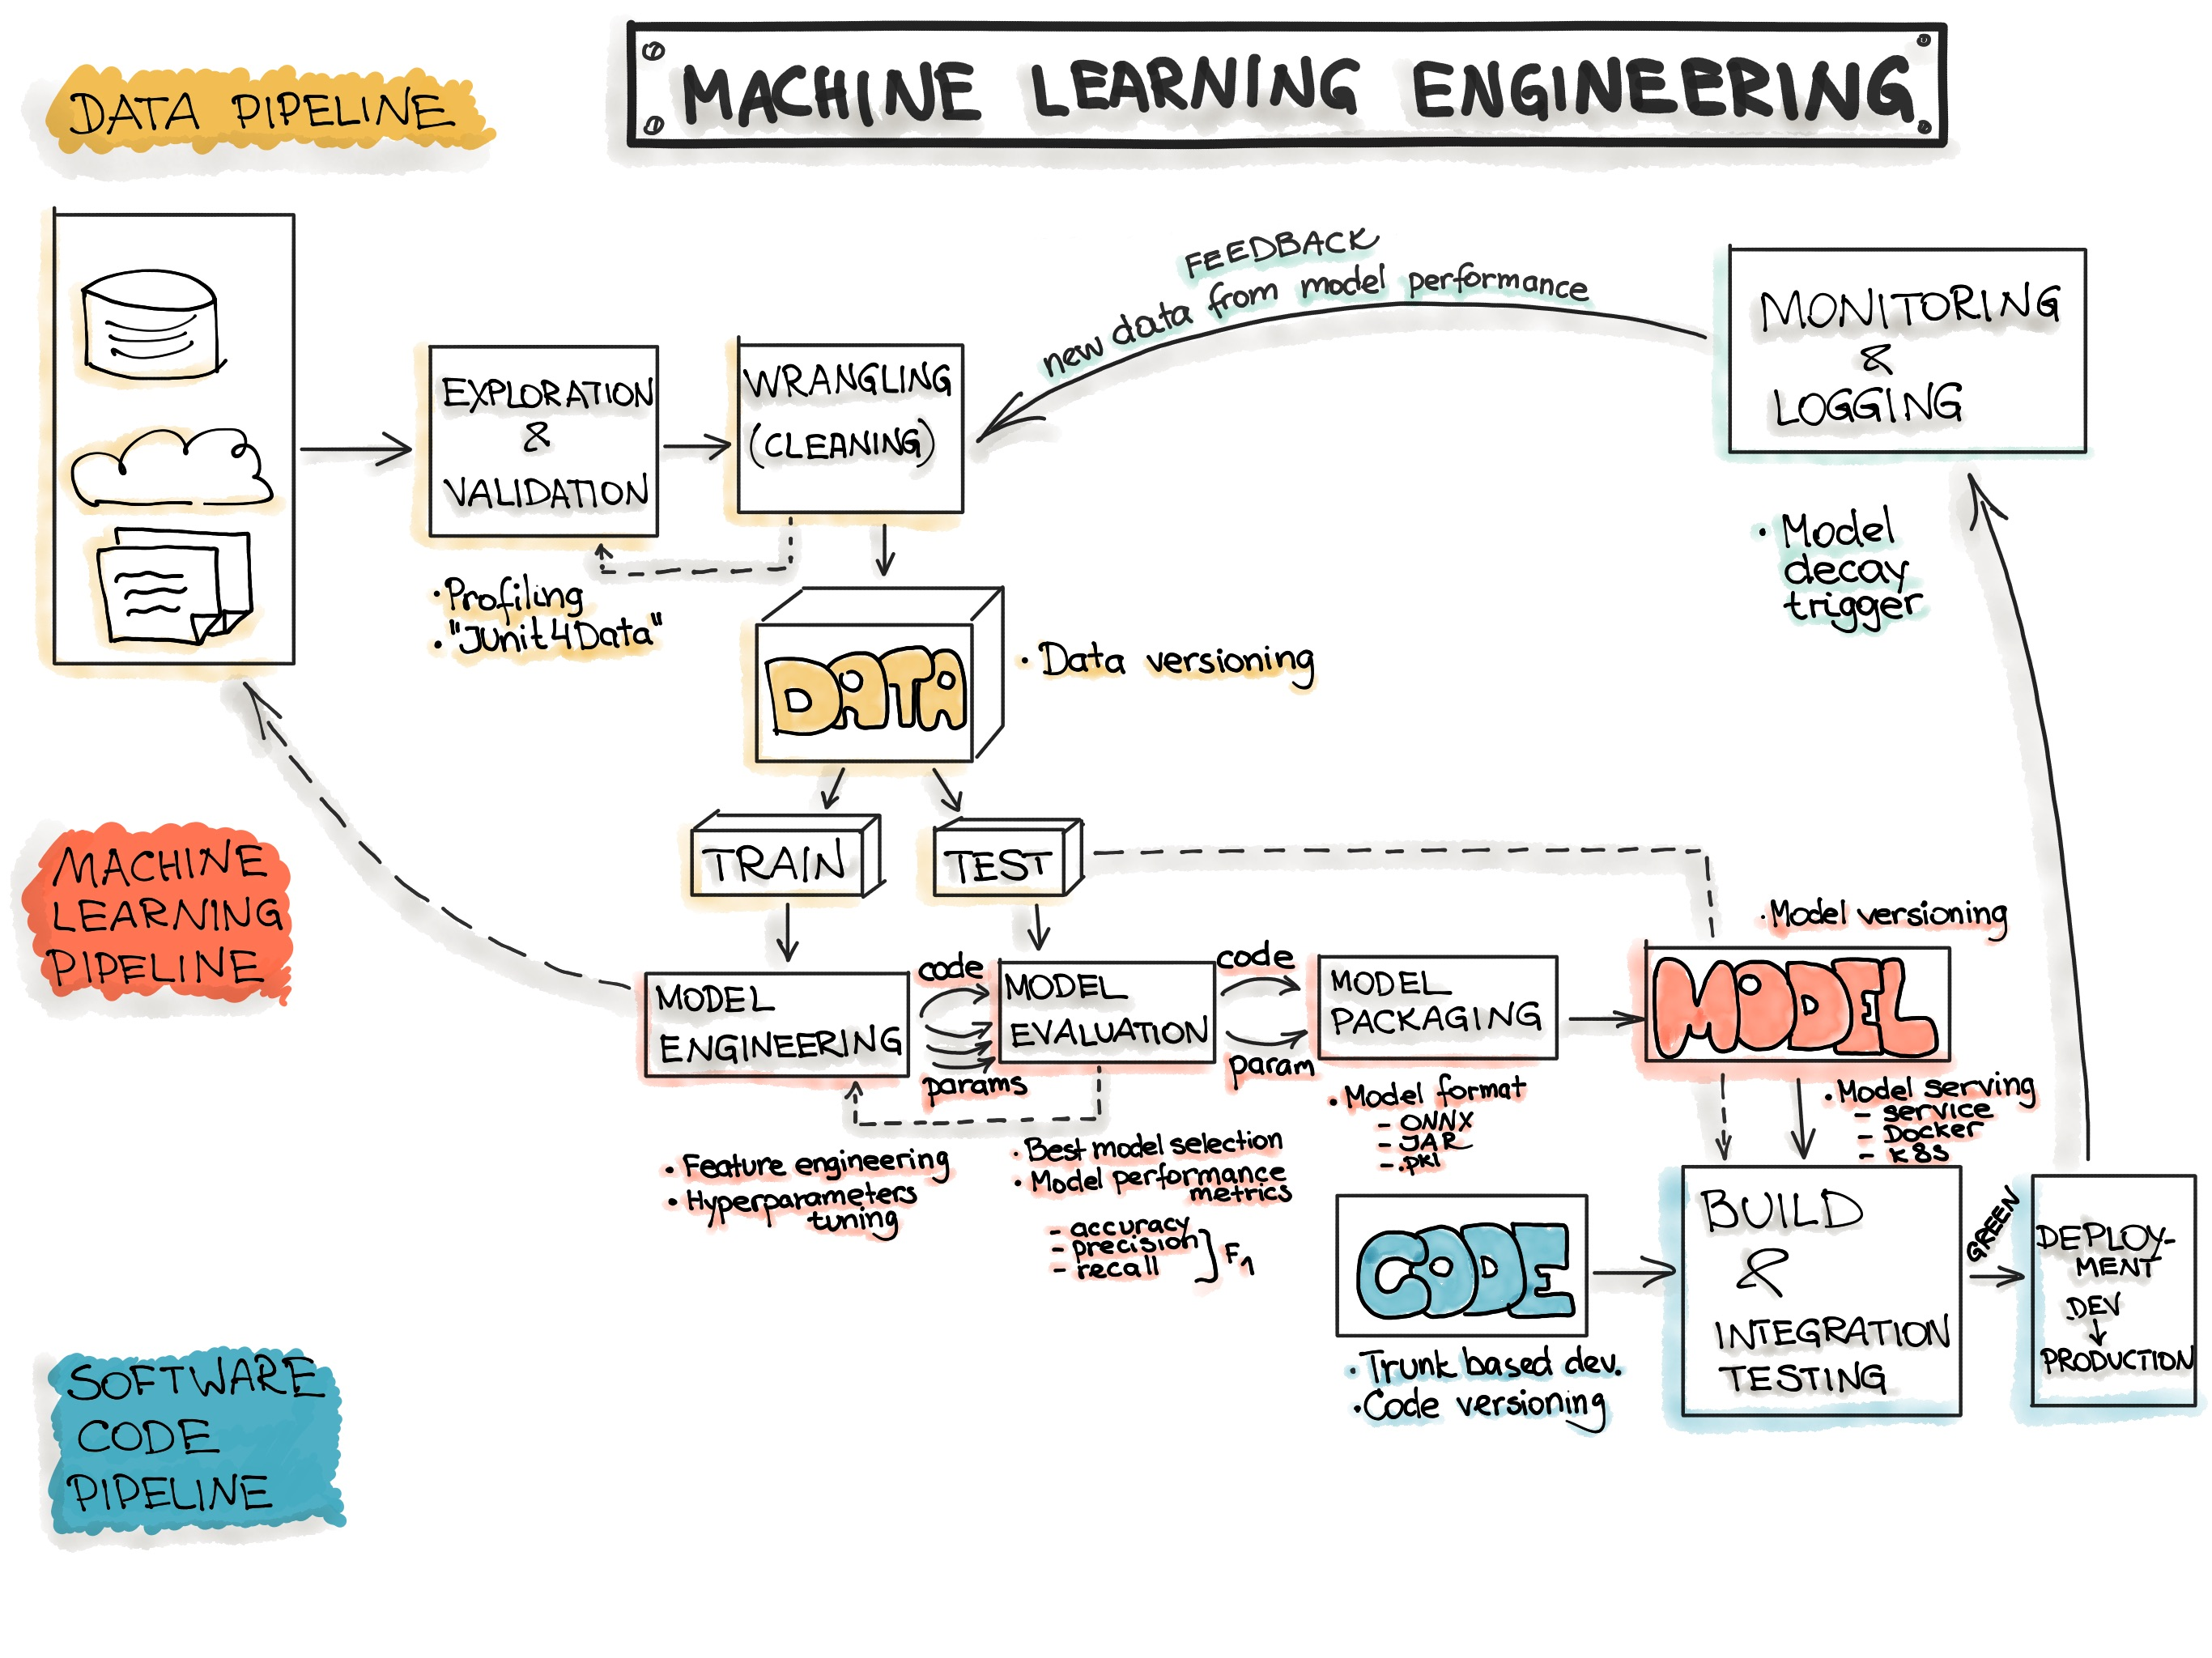

## Importation des bilbliothèques

In [1]:
import psycopg
import psycopg
import pandas as pd
import psycopg2
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', 1000)

## Data Engineering

### Rappel des identifiants pour la DB postgres en local

In [136]:
#conn = psycopg2.connect(
 #       user="clement",
 #       password="postgres",
  #      host="localhost",
   #     port="5432",
    #    database="diet"

### Création d'une fonction pour se connecter a la DB via psycopg2

In [3]:
param_dic = {
    "host"      : "localhost",
    "database"  : "diet",
    "user"      : "clement",
    "password"  : "password"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

### Fonction pour transformer la DB en Dataframe

In [4]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df


In [5]:
# Connect to the database
conn = connect(param_dic)
column_names = ["user_id","gender", "age", "height", "weight", "duration", "heart_rate", "body_temp", "calorie"]
# Execute the "SELECT *" query
df_db = postgresql_to_dataframe(conn, 
"SELECT persons.user_id as id, gender, age, height, weight, duration, heart_rate, body_temp,calorie FROM calories INNER JOIN persons ON calories.user_id = persons.user_id"
                                , column_names)
df_db.head()

Connecting to the PostgreSQL database...
Connection successful


,user_id,gender,age,height,weight,duration,heart_rate,body_temp,calorie
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<span style='color:red'> Ingestion des données depuis la base de donnée en production ( A faire) </span>

### Exploration et validation

- **Target** : calorie
- **ligne et colonnetype de variable** : 15000 lignes et 9 colonnes
- **valeur manquante** : Aucune

- **Visualisation de la Target** : 
- **Signification des variable** : 
- **Relation target variable** : 

In [11]:
# PENSER A STANDARDISER

In [140]:
df_db.shape
# 15000 lignes et 9 colonnes

(15000, 9)

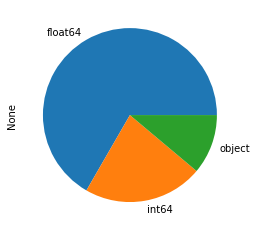

In [141]:
df_db.dtypes.value_counts().plot.pie()

In [142]:
# je compte les null mais y'en a pas
df_db.isna().sum()

user_id       0
gender        0
age           0
height        0
weight        0
duration      0
heart_rate    0
body_temp     0
calorie       0
dtype: int64

<Figure size 432x288 with 0 Axes>

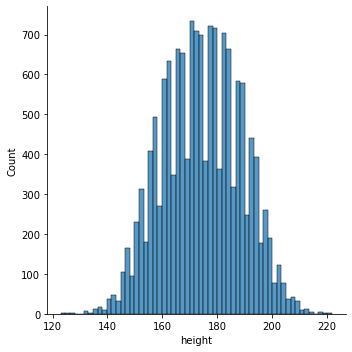

<Figure size 432x288 with 0 Axes>

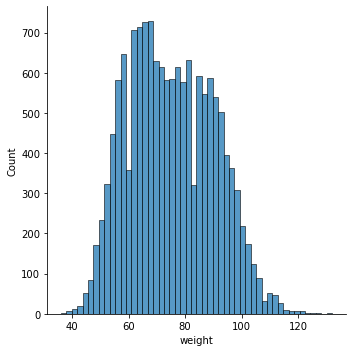

<Figure size 432x288 with 0 Axes>

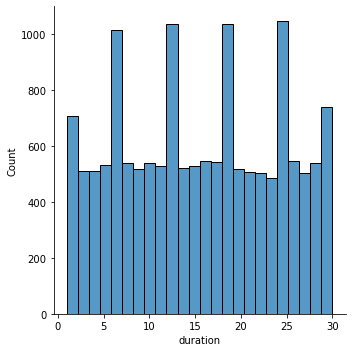

<Figure size 432x288 with 0 Axes>

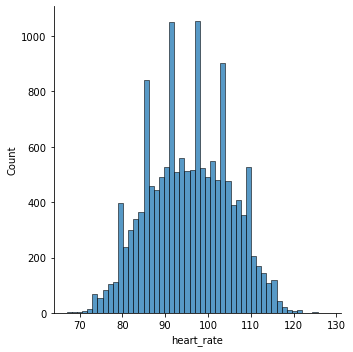

<Figure size 432x288 with 0 Axes>

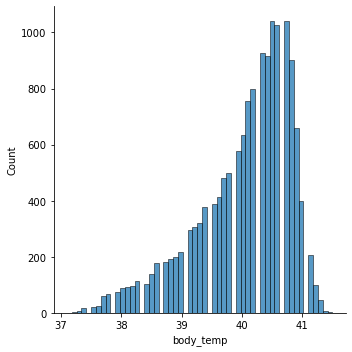

<Figure size 432x288 with 0 Axes>

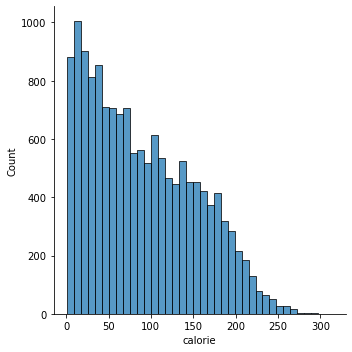

In [8]:
import matplotlib.pyplot as plt

for col in df_db.select_dtypes('float'):
    plt.figure()
    sns.displot(df_db[col])

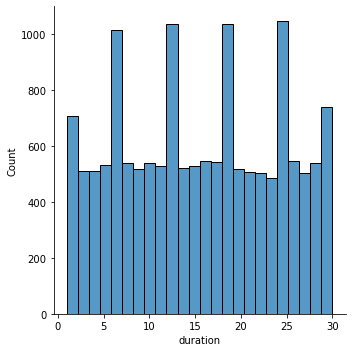

In [10]:
sns.displot(df_db.duration)

# il semble que ce soit des durée de max 30 min

In [16]:
df_db.duration.unique().value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [67]:
print(df_db.calorie.max())
print(df_db.duration.min())
print(df_db.duration.max())

# j'observe que la durée maximal d'exercise et de 30 minutes

314.0
1.0
30.0


<span style='color:red'> IMPORTANT : Dans une V2 du projet penser a créer de la données  random pour augmenter la feature duration </span>


In [8]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     15000 non-null  int64  
 1   gender      15000 non-null  object 
 2   age         15000 non-null  int64  
 3   height      15000 non-null  float64
 4   weight      15000 non-null  float64
 5   duration    15000 non-null  float64
 6   heart_rate  15000 non-null  float64
 7   body_temp   15000 non-null  float64
 8   calorie     15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [111]:
# check des corrélation

In [68]:
# Corrélation entre les feautures
cor_df = df_db.corr() 
cor_df['calorie'].sort_values(ascending= False)

calorie       1.000000
duration      0.955421
heart_rate    0.897882
body_temp     0.824558
age           0.154395
weight        0.035481
height        0.017537
user_id      -0.001661
Name: calorie, dtype: float64

In [112]:
# regression linéaire en approche

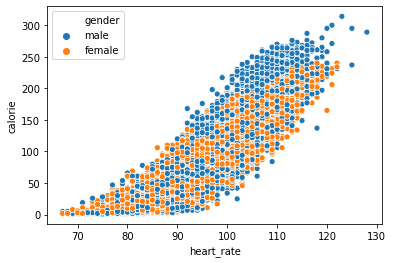

In [108]:
import seaborn as sns
sns.scatterplot(data=df_db, x="heart_rate", y="calorie", hue="gender")

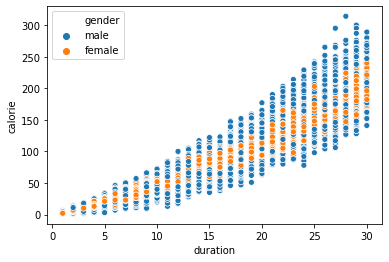

In [109]:
import seaborn as sns
sns.scatterplot(data=df_db, x="duration", y="calorie", hue="gender")

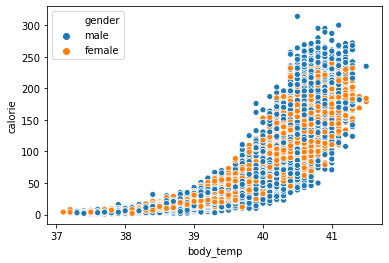

In [110]:
import seaborn as sns
sns.scatterplot(data=df_db, x="body_temp", y="calorie", hue="gender")

### Traitement des données (nettoyage) 

### Entrainement du model et split des données

In [69]:
x = df_db.drop(columns=['user_id','calorie'])
y = df_db['calorie']

jeux de test 20% et jeux d'entrainement à 80%

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

### Étiquetage des données 

In [71]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.fit_transform(X_test['gender'])
X_test

,gender,age,height,weight,duration,heart_rate,body_temp
10644,1,64,180.0,82.0,12.0,96.0,40.4
13951,1,39,194.0,93.0,18.0,89.0,40.3
8082,0,25,147.0,47.0,25.0,108.0,40.5
10284,0,72,146.0,49.0,22.0,103.0,40.5
13473,0,45,162.0,67.0,17.0,99.0,40.2
...,...,...,...,...,...,...,...
1040,0,53,164.0,65.0,13.0,98.0,40.3
669,0,28,172.0,68.0,3.0,85.0,38.6
2729,1,20,179.0,75.0,17.0,109.0,40.3
9858,1,26,174.0,77.0,9.0,88.0,39.6


## Model Engineering

### Model Training 

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

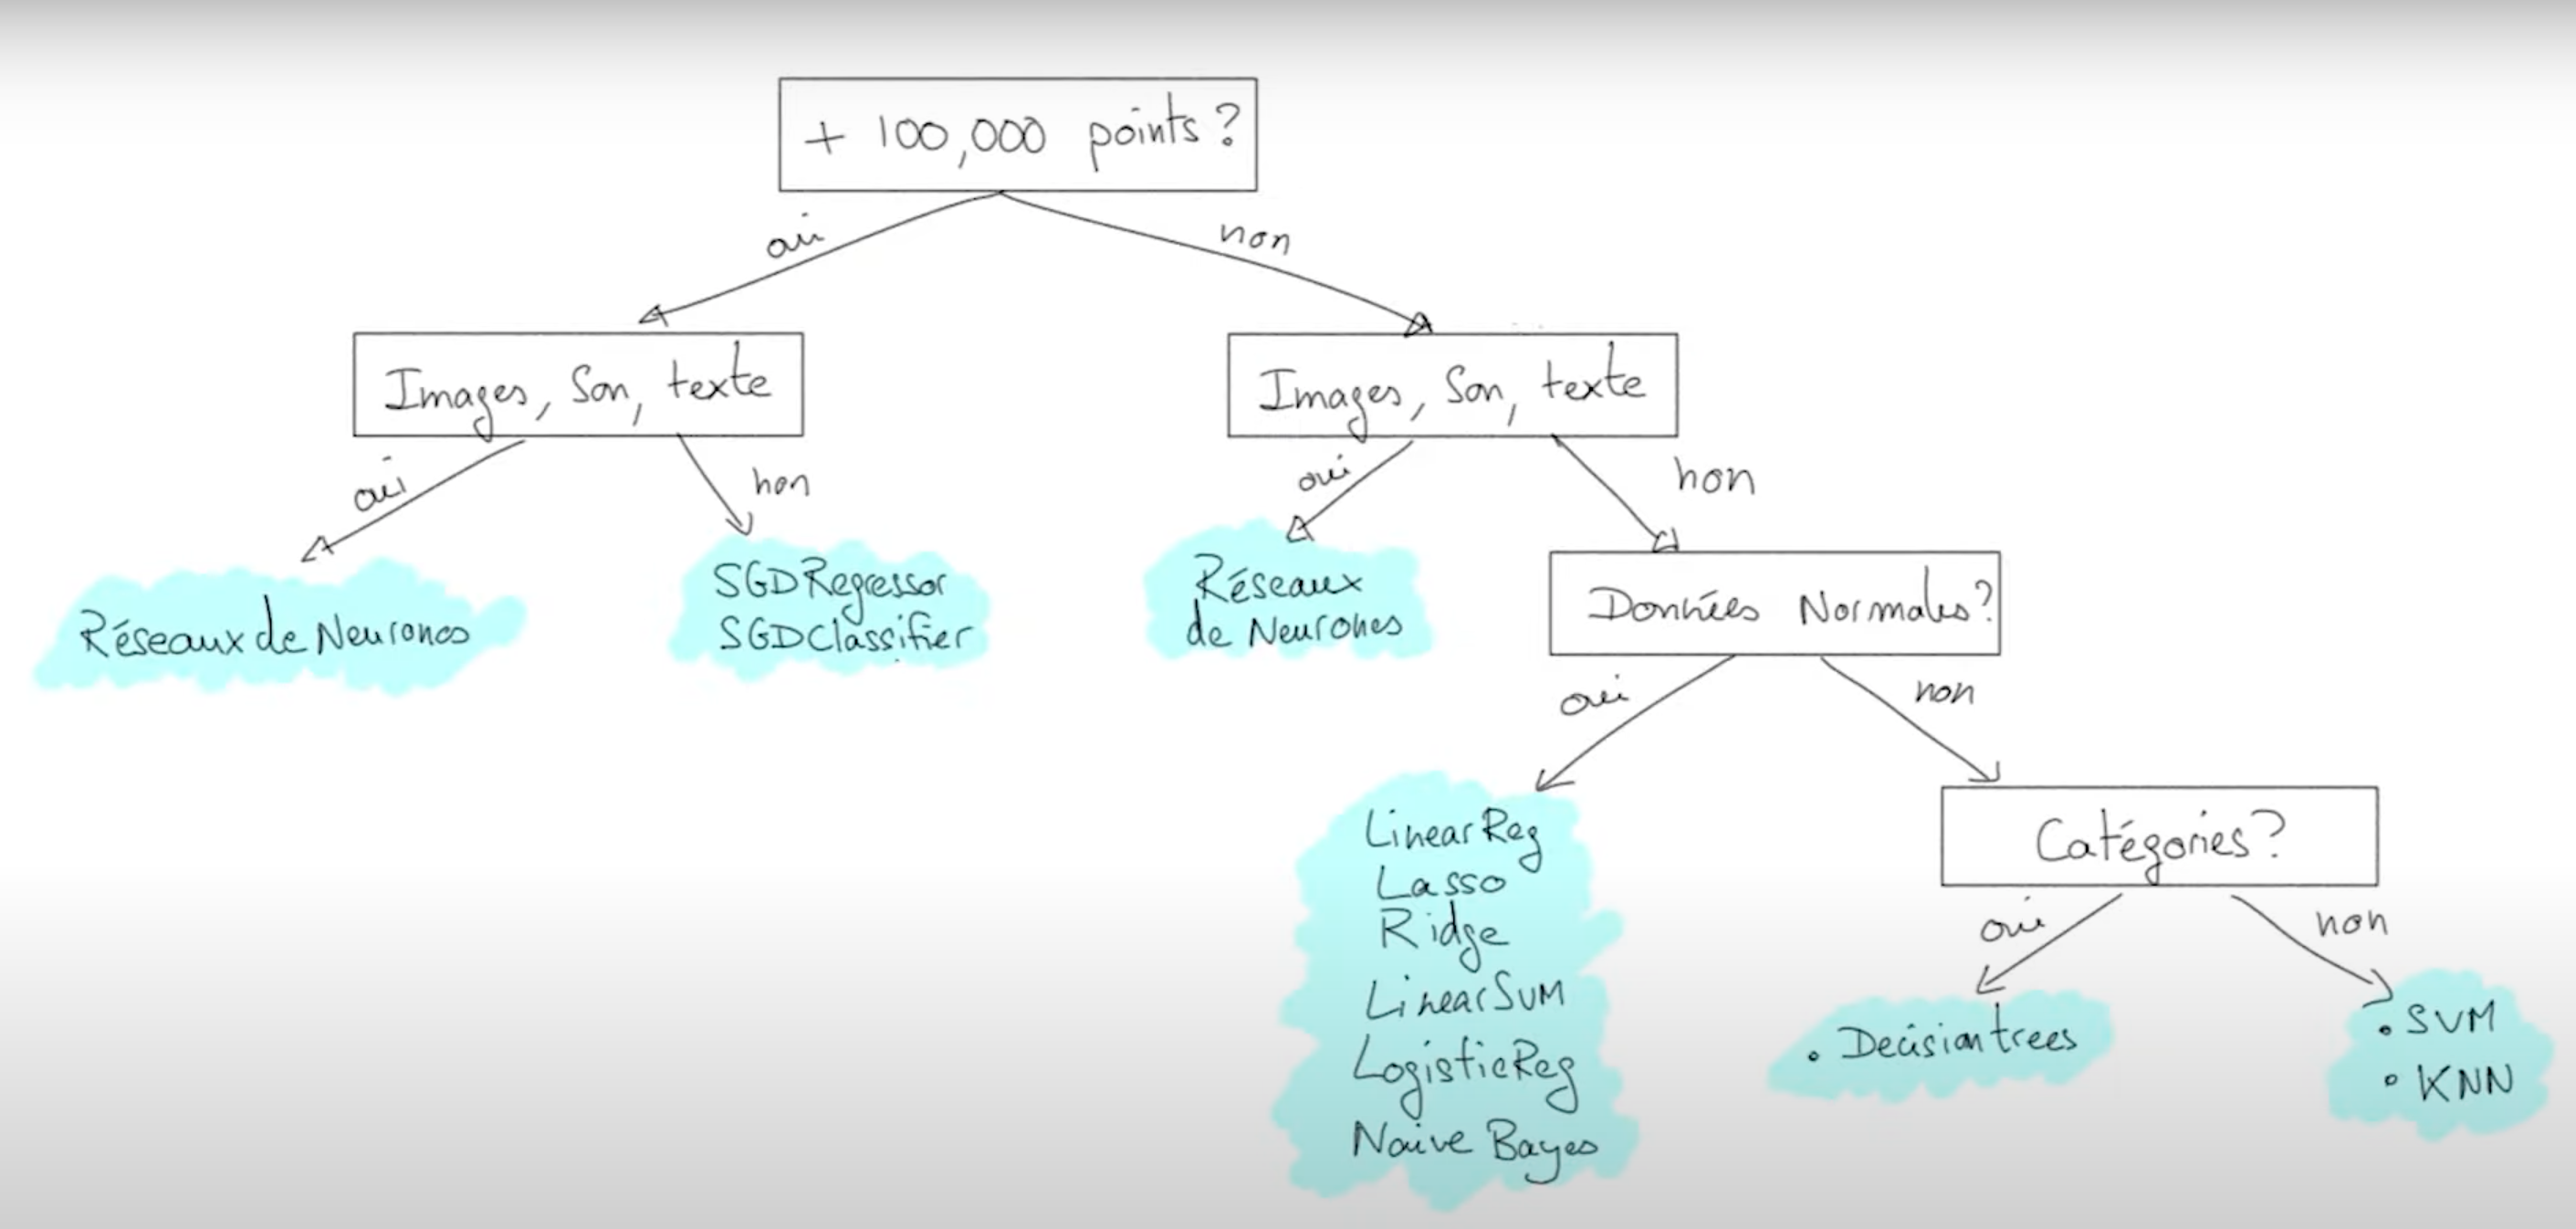

In [95]:
# Regression linéaire simple : f(x) = a(x) + b


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)



0.9674975501970083

In [86]:
X_test.shape

(3000, 7)

In [89]:
X_train.shape

(12000, 7)

In [91]:
y_train.shape

(12000,)

In [88]:
y_test.shape

(3000,)

<span style='color:red'> CROSS VAL </span>

In [73]:
from sklearn.model_selection import cross_val_score

# je fais une crois validation de 5 pour avoir le vrai bon score en moyenne des 5
cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2').mean()

0.967061546072328

In [113]:
cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')

array([0.96788404, 0.96634487, 0.96673829, 0.9661556 , 0.96818494])

In [74]:
val_score = []
for r in range(1,50):
    score = cross_val_score(LinearRegression(r), X_train, y_train, cv=5, scoring='r2').mean()
    val_score.append(score)

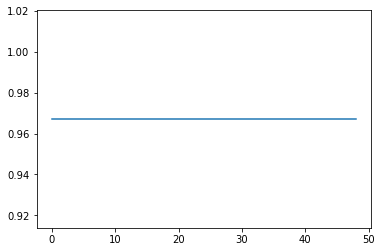

In [75]:
# sur 50 itération le score est similaire a un cheveu !
plt.plot(val_score)

In [15]:
# Randon forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9978988557462039

### Évaluation du modèle 

Je créé une fonction qui me permet de calculer les métriques de performance de mon mes 2 modèles

In [16]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np

def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

Pour la régression linéaire

In [43]:
model = LinearRegression()
run_experiment(model)

R^2 :  0.9674975501970083
MAE : 8.23144811165019
RMSE: 11.153024355760417


Pour le lasso

Pour le random forest

In [19]:
model3 = RandomForestRegressor()
run_experiment(model3)

R^2 :  0.9978674017380945
MAE : 1.7469433333333333
RMSE: 2.8568611155135515


In [20]:
# A VOIR
# --> LASSO 
# --> RIDGE

# Normalisé les donnés

### Test de modèle

### Model Packaging 

In [21]:
#print(rf.predict([[1,68,190.0,94.0,29.0,105.0,40.8]]))

In [22]:
#print(rf.predict([[0,39,182.0,82.0,3600,150.0,40.0 ]]))

In [23]:
#load avec pickle

import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [24]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9978988557462039


In [25]:
#load avec joblib
import joblib
joblib.dump(rf, filename)


['finalized_model.sav']

In [26]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9978988557462039


In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
test_data_prediction = loaded_model.predict(X_test)

In [29]:
mean_absolute_error(y_test, test_data_prediction)

1.7361300000000002

## Déploiement du model

### Model Serving

### Model Performance Monitoring 

### Model Performance Logging

### Sécurité